# PimaIndiansDiabetes Datasets

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
df = pd.read_csv('PimaIndiansDiabetes.csv')

In [100]:
df.sample(5)

,TimesPregnant,GlucoseConcentration,BloodPrs,SkinThickness,Serum,BMI,DiabetesFunct,Age,Class
444,4,117,62,12,0,29.7,0.380,30,1
235,4,171,72,0,0,43.6,0.479,26,1
408,8,197,74,0,0,25.9,1.191,39,1
56,7,187,68,39,304,37.7,0.254,41,1
707,2,127,46,21,335,34.4,0.176,22,0


In [101]:
df.shape

(768, 9)

In [102]:
df.size

6912

In [103]:
df.Class.unique()

array([1, 0], dtype=int64)

In [104]:
df.Class.value_counts()

0    500
1    268
Name: Class, dtype: int64

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TimesPregnant         768 non-null    int64  
 1   GlucoseConcentration  768 non-null    int64  
 2   BloodPrs              768 non-null    int64  
 3   SkinThickness         768 non-null    int64  
 4   Serum                 768 non-null    int64  
 5   BMI                   768 non-null    float64
 6   DiabetesFunct         768 non-null    float64
 7   Age                   768 non-null    int64  
 8   Class                 768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [106]:
df.sample(3)

,TimesPregnant,GlucoseConcentration,BloodPrs,SkinThickness,Serum,BMI,DiabetesFunct,Age,Class
453,2,119,0,0,0,19.6,0.832,72,0
634,10,92,62,0,0,25.9,0.167,31,0
667,10,111,70,27,0,27.5,0.141,40,1


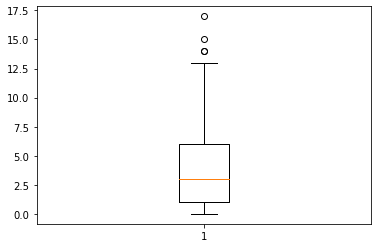

In [107]:
plt.boxplot(df['TimesPregnant'])
plt.show()

In [108]:
df = df[df['TimesPregnant']<13.0]

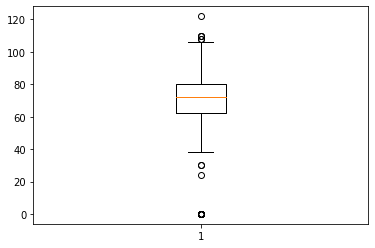

In [109]:
plt.boxplot(df['BloodPrs'])
plt.show()

In [110]:
df = df[df['BloodPrs']<113]  

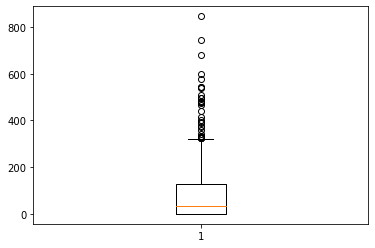

In [111]:
plt.boxplot(df['Serum'])
plt.show()

In [112]:
df = df[df['Serum']<300]

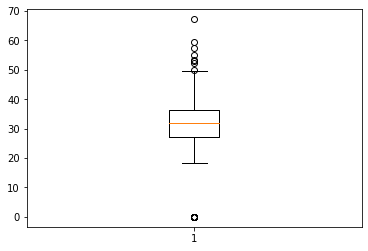

In [113]:
plt.boxplot(df['BMI'])
plt.show()

In [114]:
df = df[df['BMI']<51]

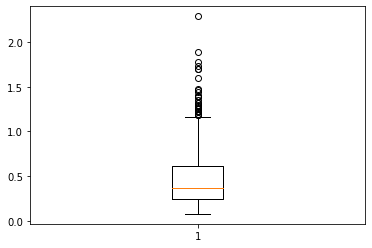

In [115]:
plt.boxplot(df['DiabetesFunct'])
plt.show()

In [116]:
df = df[df['DiabetesFunct']<1.6]

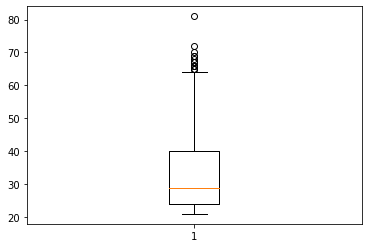

In [117]:
plt.boxplot(df['Age'])
plt.show()

In [118]:
df = df[df['Age']<65]

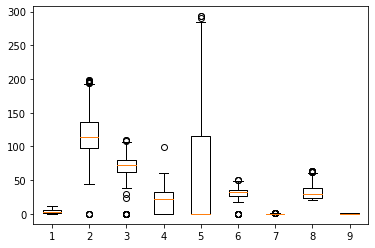

In [119]:
plt.boxplot(df)
plt.show()

In [120]:
df.sample()

,TimesPregnant,GlucoseConcentration,BloodPrs,SkinThickness,Serum,BMI,DiabetesFunct,Age,Class
721,1,114,66,36,200,38.1,0.289,21,0


In [121]:
#df.iloc[:,:-1]
X = df.loc[:,'TimesPregnant':'Age']
X.sample(3)

,TimesPregnant,GlucoseConcentration,BloodPrs,SkinThickness,Serum,BMI,DiabetesFunct,Age
591,2,112,78,50,140,39.4,0.175,24
534,1,77,56,30,56,33.3,1.251,24
751,1,121,78,39,74,39.0,0.261,28


In [122]:
y = df.Class
y[:3]

0    1
1    0
2    1
Name: Class, dtype: int64

In [146]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
print("Trainin Data:",model.score(X_train,y_train)*100)
print("Normal Data:",model.score(X,y)*100)
print("Testing Data:",model.score(X_test,y_test)*100)
y_predi = model.predict(X_test)
print("Predicted:",model.score(X_test,y_predi)*100)

Trainin Data: 100.0
Normal Data: 92.11678832116789
Testing Data: 68.6046511627907
Predicted: 100.0


In [124]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print("confusion_matrix:")
print(confusion_matrix(y_test,y_predi))
print("classification_report:")
print(classification_report(y_test,y_predi))
print("accuracy_score:")
print(accuracy_score(y_test,y_predi))

confusion_matrix:
[[81 31]
 [30 30]]
classification_report:
              precision    recall  f1-score   support

           0       0.73      0.72      0.73       112
           1       0.49      0.50      0.50        60

    accuracy                           0.65       172
   macro avg       0.61      0.61      0.61       172
weighted avg       0.65      0.65      0.65       172

accuracy_score:
0.6453488372093024


In [125]:
from sklearn import tree
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_1 <= 142.50
|   |--- feature_5 <= 27.05
|   |   |--- feature_7 <= 59.00
|   |   |   |--- feature_0 <= 6.50
|   |   |   |   |--- feature_6 <= 0.68
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_6 >  0.68
|   |   |   |   |   |--- feature_6 <= 0.69
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_6 >  0.69
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  6.50
|   |   |   |   |--- feature_7 <= 30.50
|   |   |   |   |   |--- feature_7 <= 26.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_7 >  26.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_7 >  30.50
|   |   |   |   |   |--- class: 0
|   |   |--- feature_7 >  59.00
|   |   |   |--- feature_0 <= 6.00
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  6.00
|   |   |   |   |--- class: 0
|   |--- feature_5 >  27.05
|   |   |--- feature_1 <= 101.50
|   |   |   |--- feature_6 <= 0.66
|   |   |   |   |--- feature_2 <= 5

In [126]:
with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)

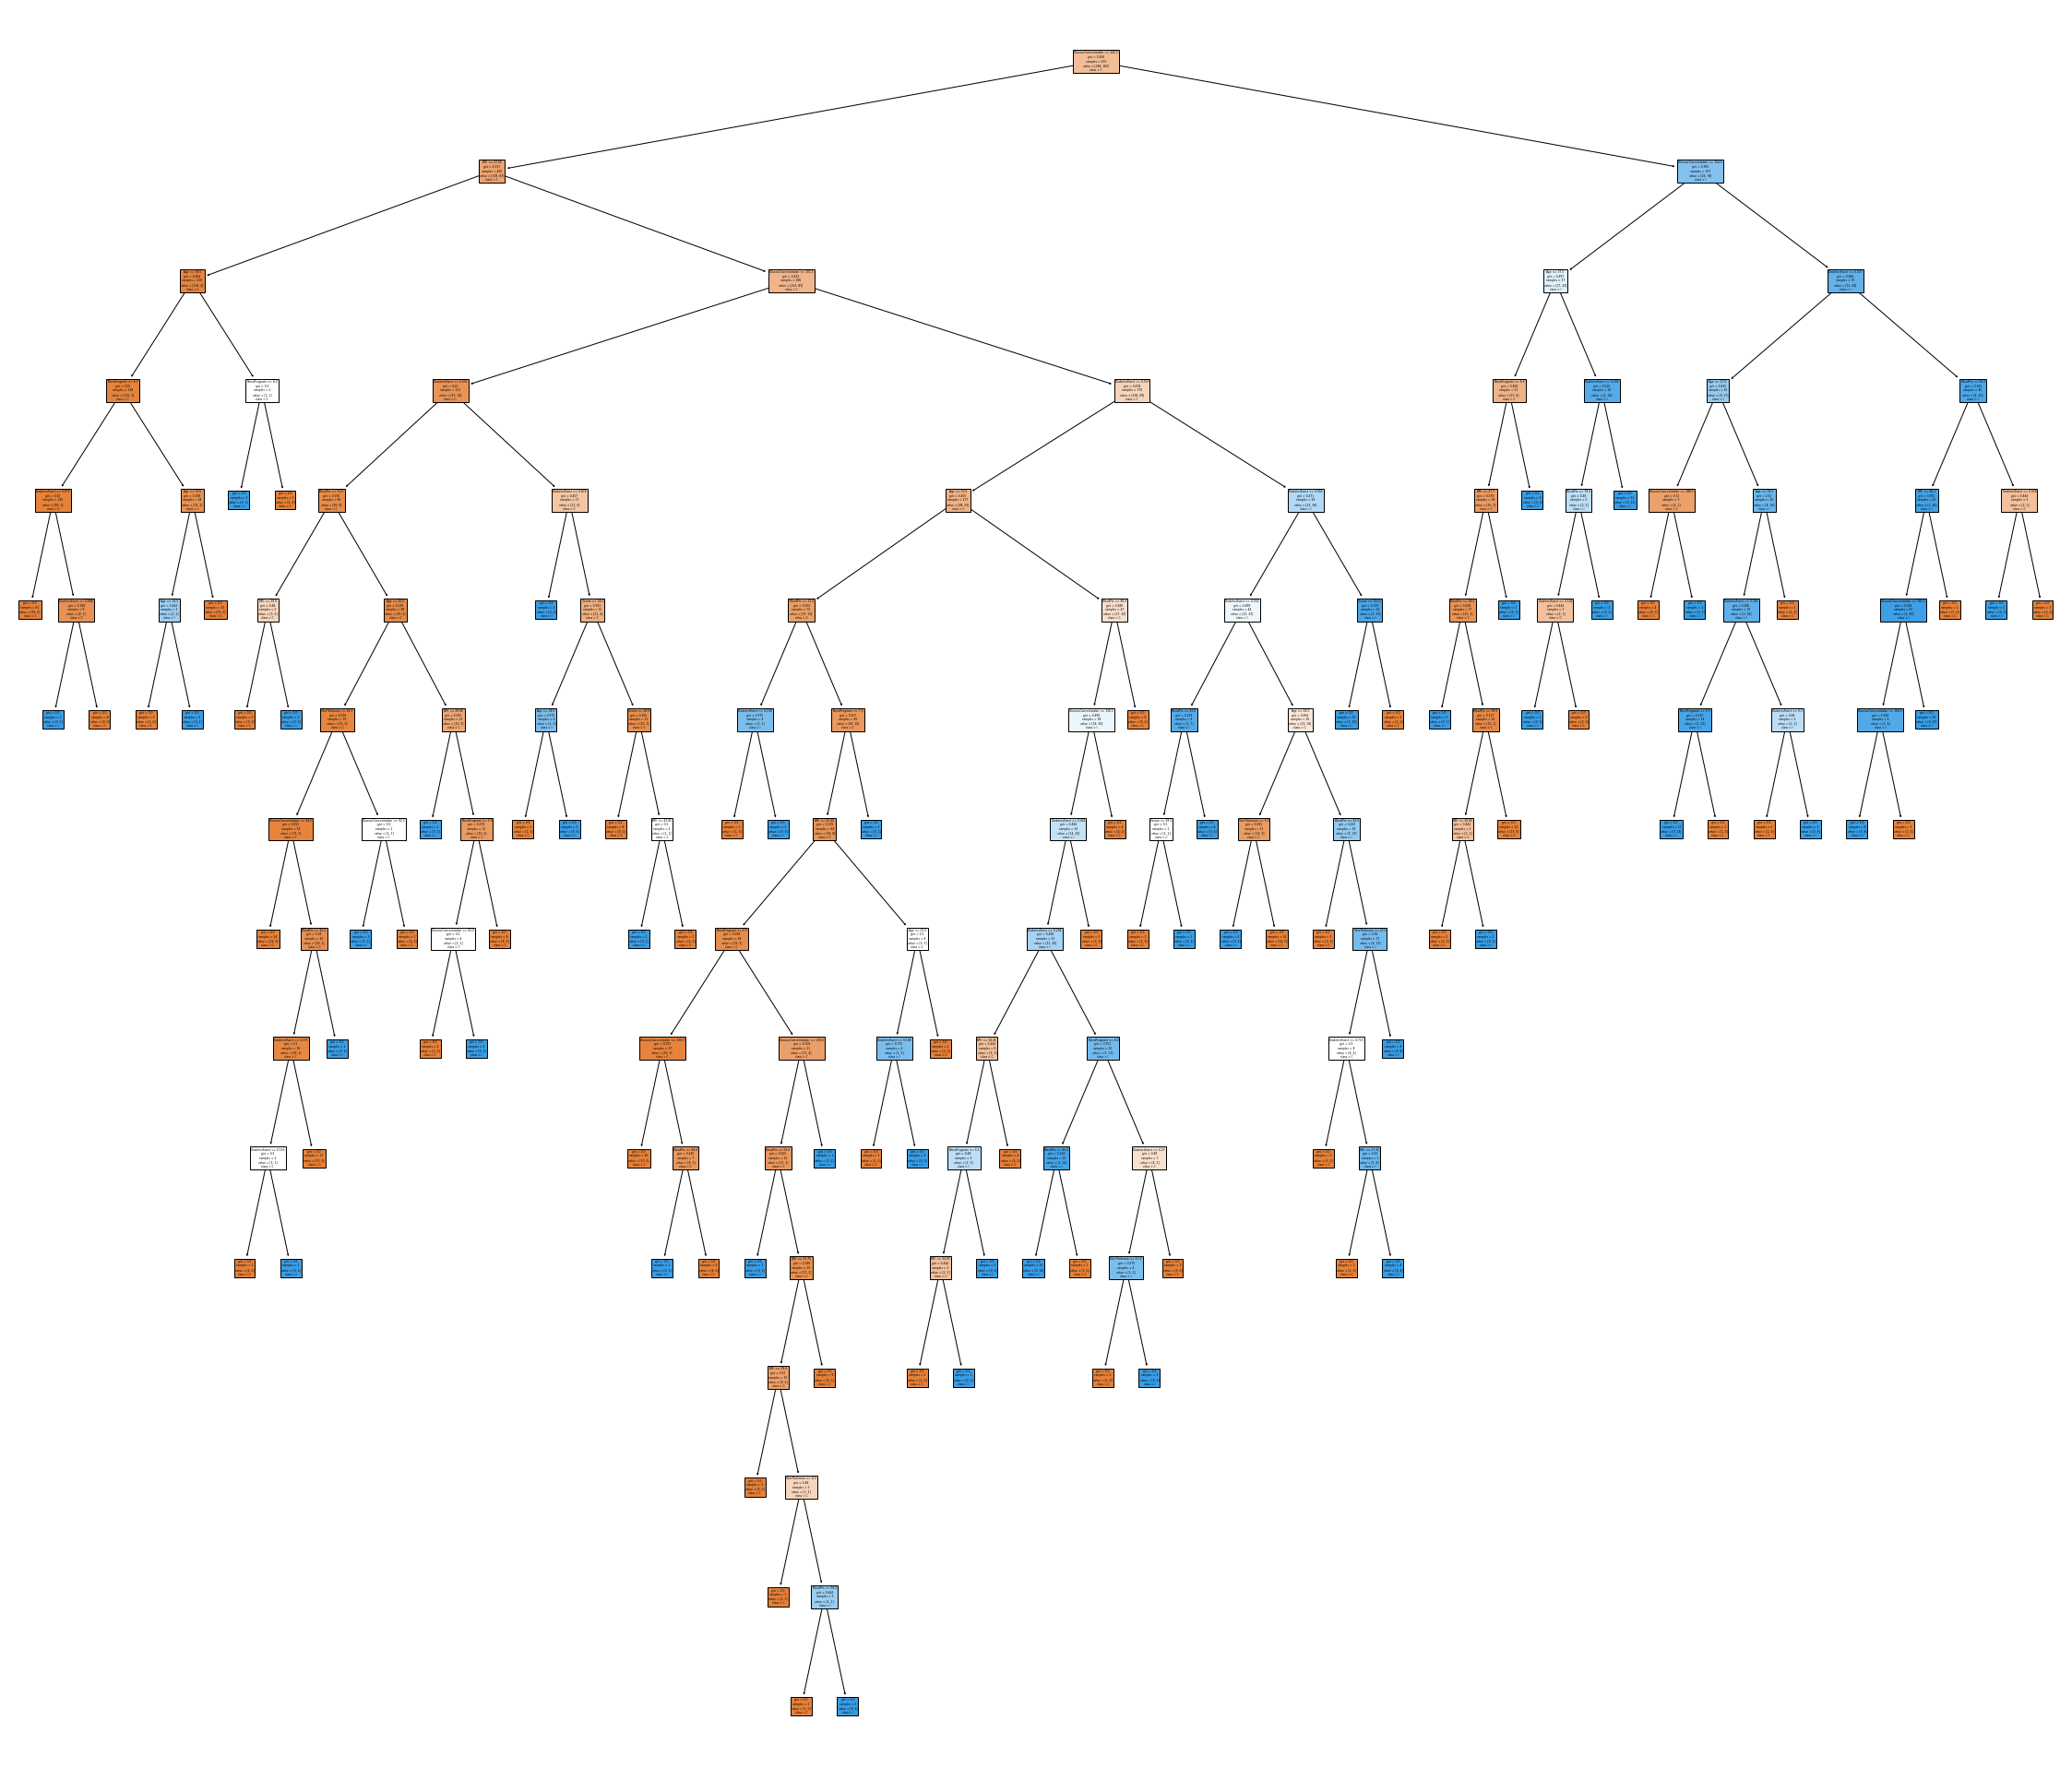

In [127]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(40,35))
_ = tree.plot_tree(model, 
                   feature_names=df.columns,  
                   class_names='Class',
                   filled=True)